# Picture processing

by: Jelte Molenaar en Michiel van Soest

In deze notebook worden de huidige afbeeldingen aangepast en opgeslagen om meer data te creëren voor het RCNN. De code bestaat uit verschillende delen waarin fotos bewerkt en gevisualiseerd worden. 

### Importeren en path selecteren
In het eerste gedeelte van de code worden de benodigde libaries geimporteerd en de verschillende pade toegekend aan locaties waarheen de nieuwe frames heen geschreven worden. 

In [1]:
from PIL import Image
from PIL import ImageEnhance
import glob
import matplotlib.pyplot as plt

In [2]:
# folder path voor de output
folder_path = "/datc/shipping/processed_pictures_j/frames/"
folder_path_overlay = "/datc/shipping/processed_pictures_j/overlays/"

### Aanpassingen op de originele frame
Hieronder staan de 5 verschillende factoren. Deze factoren worden later gebruikt in de code. Bij elke factor is toegekend aan waardes in een lijst. In het geval hieronder zijn alleen de maximale waarde(s) gebruikt om de te verminderen als er getest wordt met het script.   

In [3]:
brightness_factor = [0.3,1.4]        # [0.4,0.5,0.6,0.7,0.8,0.9,1.1,1.2,1.3,1.4]
contrast_factor   = [0.3,1.4]        # [0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.2,1.3,1.4]
sharpness_factor  = [5.0,20.0]        # [5.0, 10.0, 15.0, 20.0]
color_factor      = [0.0,10.0]             # [0.0, 3.0, 6.0, 10.0]
mirror_factor     = [1]

### Functies | Aanpassen afbeeldingen
In de functies hieronder worden de helderheid, contrast, scherpte en kleur van de afbeeldingen aangepast. Elke functie heeft hiervoor de orginele afbeelding , framenummer en factor waarmee de desbetreffende afbeelding wordt aangepast nodig. Nadat er een naam aangemaakt wordt ondergaat de afbeelding de verandering en wordt het opgeslagen. <br/>

De reden dat er functies zijn aangemaakt is dat dit de mogelijkheid bied om de functies een voor een aan te roepen. Hierdoor kan per functie aangepast worden hoe vaak en met welke waarde deze een output genereerd.

In [4]:
def adjust_brightness(img_origional, frame_number, brightness_factor):
    frame_savename = folder_path + 'frame_' + str(frame_number) +'.jpg'
    enhancer_object = ImageEnhance.Brightness(img_origional)
    out = enhancer_object.enhance(brightness_factor)
    out.save(frame_savename)


In [5]:
def adjust_contrast(img_origional, frame_number, contrast_factor):
    frame_savename = folder_path + 'frame_' + str(frame_number) +'.jpg'
    enhancer_object = ImageEnhance.Contrast(img_origional)
    out = enhancer_object.enhance(contrast_factor)
    out.save(frame_savename)
    

In [6]:
def adjust_sharpness(img_origional, frame_number, sharpness_factor):
    frame_savename = folder_path + 'frame_' + str(frame_number) +'.jpg'
    enhancer_object = ImageEnhance.Sharpness(img_origional)
    out = enhancer_object.enhance(sharpness_factor)
    out.save(frame_savename)

In [7]:
def adjust_color(img_origional, frame_number, color_factor):
    frame_savename =  folder_path + 'frame_' + str(frame_number) +'.jpg'
    enhancer_object = ImageEnhance.Color(img_origional)
    out = enhancer_object.enhance(color_factor)
    out.save(frame_savename)

### Functie | Copy overlay
Bij elke afbeelding is een overlay noodzakelijk om het NN te kunnen voorzien van de juiste informatie. Wanneer een orginele afbeelding wordt veranderd moet hierbij de overlay in tact blijven maar wel de passende naam krijgen die bij de afbeelding hoort. In de copy_overlay functie gebeurt dit. De orginele overlay wordt gepakt en krijgt de naam van het daarbij horende aangepast frame. Daarna wordt de overlay opgeslagen op de locatie waarin alle overlays staan. 

In [8]:
def copy_overlay(overlay_origional, frame_number, overlay_number):
    overlay_savename = folder_path_overlay + 'frame_' + str(frame_number) +'_mask.gif'
    overlay_origional.save(overlay_savename)

### Functie | Spiegelen afbeelding
Naast de functies om de  helderheid, contrast, scherpte en kleur van een afbeelding aan te passen is het ook mogelijk om de afbeelding te spiegelen. Dit biedt mogelijkheden om de dataset uit te breiden. In de twee onderstaande functies worden de originele afbeelding en overlay gespiegeld en voorzien van een nieuwe naam. Vervolgens worden deze opgeslagen op de desbetreffende locatie. 

In [9]:
def mirror_image_origional(img_origional, frame_number, mirror_factor):
    frame_savename =  folder_path + 'frame_' + str(frame_number) +'.jpg'
    out = img_origional.transpose(Image.FLIP_LEFT_RIGHT)
    out.save(frame_savename)

In [10]:
def mirror_image_overlay(overlay_origional, frame_number, overlay_number):
    overlay_savename = "/datc/shipping/processed_pictures_j/overlays/frame_"+ str(frame_number) +'_mask.gif'
    out = overlay_origional.transpose(Image.FLIP_LEFT_RIGHT)
    out.save(overlay_savename)

### Functie | Loop
In de changeimage functie worden de bovenstaande functies aangeroepen. Aan het begin wordt de orginele afbeelding aangeroepen. Vervolgens wordt gekeken naar hoe vaak de aanpassing aan de afbeelding gedaan moet worden (kijken naar hoeveel factoren er aanwezig zijn). Daarna wordt het framenummer 1 hoger en ondergaat de afbeelding de daadwerkelijke verandering. Om tijdens het maken van deze cel mogelijke fouten te ontdekken wordt het framenummer en de type verandering geprint. Als laatste wordt de overlay gekopierd en in het geval van het spiegelen, eerst gespiegeld en daarna gekopieerd. 

In [11]:
def changeimage(location_frames,brightness_factor,contrast_factor,sharpness_factor,color_factor, frame_number, location_overlays):
    img_origional = Image.open(location_frames)
    overlay_origional = Image.open(location_overlays)
    for x in brightness_factor:
        frame_number = frame_number + 1
        adjust_brightness(img_origional, frame_number, x)
        print(frame_number, "brightness", x)
        copy_overlay(overlay_origional, frame_number, overlay_number)

    for x in contrast_factor:
        frame_number = frame_number + 1
        adjust_contrast(img_origional, frame_number, x)
        print(frame_number, "contrast" , x)
       
        copy_overlay(overlay_origional, frame_number, overlay_number)

    for x in sharpness_factor:
        frame_number = frame_number + 1
        adjust_sharpness(img_origional, frame_number, x)
        print(frame_number, "sharpness", x)
     
        copy_overlay(overlay_origional, frame_number, overlay_number)

    for x in color_factor:
        frame_number = frame_number + 1
        adjust_color(img_origional, frame_number, x)
        print(frame_number, "Color", x)
     
        copy_overlay(overlay_origional, frame_number, overlay_number)
    
    for x in mirror_factor:
        frame_number = frame_number + 1
        mirror_image_origional(img_origional, frame_number, x)
        print(frame_number, "mirror origional")
    
        mirror_image_overlay(overlay_origional, frame_number, overlay_number)
        
    return frame_number        

## Delete files
Met het onderstaande script worden de oude frames en overlays verwijderd uit de aangegeven. Het verwijderen van de files op deze manier heeft voorkeur boven het handmatig verwijderen, met name op de server kost dit veel tijd. 

In [12]:
#clean directory

import glob, os, os.path

mydir = '/datc/shipping/processed_pictures_j/frames/'

filelist = glob.glob(os.path.join(mydir, "*.jpg"))
for f in filelist:
    os.remove(f)
    
mydir = '/datc/shipping/processed_pictures_j/overlays/'

filelist = glob.glob(os.path.join(mydir, "*.gif"))
for f in filelist:
    os.remove(f)


### Aanmaken frames en overlays met aanpassingen
Nadat de map met oude frames leeg is gehaald kunnen de afbeeldingen daadwerkelijk gerealiseerd worden. Dit gebeurt in de cel hieronder. Hier wordt de functie changeimage net zo vaak aangeroepen als er afbeeldingen beschikbaar zijn in het geselecteerde folder.

In [13]:
#"test weghalen als het geen test meer is"
frame_number = 250
overlay_number = 250

frames_number = glob.glob("/datc/shipping/origional_pictures_j/frames_test/*")
frames_number = len(frames_number)
print(frames_number, "frames in directory"  )
frames =  len(brightness_factor) + len(sharpness_factor) + len(color_factor) + len(contrast_factor) + len(mirror_factor) #aantal bewerkingen
print(frames, "adjustments on frames"  )

frame = "/datc/shipping/origional_pictures_j/frames_test/frame_1.jpg" #origional image
overlay = '/datc/shipping/origional_pictures_j/overlays_test/frame_1_mask.gif' #origional overlay

for i in range(frames_number):
    print("___________________","bewerken afbeelding",i + 1,"___________________")
    changeimage(frame,brightness_factor,contrast_factor,sharpness_factor,color_factor, frame_number, overlay)
    frame_number = frame_number + frames
    
    frame = '/datc/shipping/origional_pictures_j/frames_test/frame_'+str(i + 1)+'.jpg' #origional image
    overlay = '/datc/shipping/origional_pictures_j/overlays_test/frame_'+str(i + 1)+'_mask.gif' #origional overlay


3 frames in directory
9 adjustments on frames
___________________ bewerken afbeelding 1 ___________________
251 brightness 0.3
252 brightness 1.4
253 contrast 0.3
254 contrast 1.4
255 sharpness 5.0
256 sharpness 20.0
257 Color 0.0
258 Color 10.0
259 mirror origional
___________________ bewerken afbeelding 2 ___________________
260 brightness 0.3
261 brightness 1.4
262 contrast 0.3
263 contrast 1.4
264 sharpness 5.0
265 sharpness 20.0
266 Color 0.0
267 Color 10.0
268 mirror origional
___________________ bewerken afbeelding 3 ___________________
269 brightness 0.3
270 brightness 1.4
271 contrast 0.3
272 contrast 1.4
273 sharpness 5.0
274 sharpness 20.0
275 Color 0.0
276 Color 10.0
277 mirror origional


## Visualiseren
Tijdens het debuggen van de de bovenstaande code liepen we meerdere malen tegen het probleem aan dat het moeilijk was om controleren of de frames en overlays bij elkaar paste. Hiervoor is het volgende stuk code gerealiseerd. 
In dit stuk code was het mogelijk om een framenummer te selecteren (vaak het framenummer waarbij er van origneel frame gewisseld werd) en de afbeelding die ervoor en erna komt te zien. Het bewerkte frames worden onder de overlay geplaast, daarna is het mogelijk om visueel te controlleren of de frames en overlays passend zijn.  

In [14]:
select_frame_number = 259
location_frame = '/datc/shipping/processed_pictures_j/frames/frame_'
location_overlay = '/datc/shipping/processed_pictures_j/overlays/frame_'

259 258 260


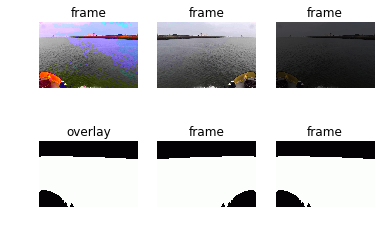

In [15]:
select_frame_number_2 = select_frame_number - 1
select_frame_number_3 = select_frame_number + 1

print(select_frame_number, select_frame_number_2, select_frame_number_3)

img_frame = location_frame + str(select_frame_number)+'.jpg'
img_overlay = location_overlay + str(select_frame_number) + '_mask.gif'

img_frame_2 = location_frame + str(select_frame_number_2)+'.jpg'
img_overlay_2 = location_overlay + str(select_frame_number_2) + '_mask.gif'

img_frame_3 = location_frame + str(select_frame_number_3)+'.jpg'
img_overlay_3 = location_overlay + str(select_frame_number_3) + '_mask.gif'

read_img_frame = plt.imread(img_frame)
read_img_overlay = plt.imread(img_overlay)

read_img_frame_2 = plt.imread(img_frame_2)
read_img_overlay_2 = plt.imread(img_overlay_2)

read_img_frame_3 = plt.imread(img_frame_3)
read_img_overlay_3 = plt.imread(img_overlay_3)

# frame before
plt.subplot(2,3,1)
plt.imshow(read_img_frame_2)
plt.title('frame')
plt.axis('off')

# overlay before
plt.subplot(2,3,4)
plt.imshow(read_img_overlay_2)
plt.title('overlay')
plt.axis('off')

# frame original
plt.subplot(2,3,2)
plt.imshow(read_img_frame)
plt.title('frame')
plt.axis('off')

# overlay original
plt.subplot(2,3,5)
plt.imshow(read_img_overlay)
plt.title('frame')
plt.axis('off')

#
plt.subplot(2,3,3)
plt.imshow(read_img_frame_3)
plt.title('frame')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(read_img_overlay_3)
plt.title('frame')
plt.axis('off')

plt.show()